**In this Code to**


1.   Preprocess the Data
2.   Build ANN Model (Input Layer, 3 Hidden Layer, Output Layer)
3.   Testing the Model
      











In [55]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import random as rnd

# for  visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

**Preprocess the Data**

In [56]:
df = pd.read_csv('House Price India.csv')

In [57]:
print(df.columns.values)

['id' 'Date' 'number of bedrooms' 'number of bathrooms' 'living area'
 'lot area' 'number of floors' 'waterfront present' 'number of views'
 'condition of the house' 'grade of the house'
 'Area of the house(excluding basement)' 'Area of the basement'
 'Built Year' 'Renovation Year' 'Postal Code' 'Lattitude' 'Longitude'
 'living_area_renov' 'lot_area_renov' 'Number of schools nearby'
 'Distance from the airport' 'Price']


In [58]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [59]:
df.tail()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14615,6762830250,42734,2,1.5,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.0,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.0,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.0,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14619,6762831463,42734,3,1.0,900,4770,1.0,0,0,3,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


In [60]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [62]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,14620.0,6.762821e+09,6237.574799,6.762810e+09,6.762815e+09,6.762821e+09,6.762826e+09,6.762832e+09
Date,14620.0,4.260454e+04,67.347991,4.249100e+04,4.254600e+04,4.260000e+04,4.266200e+04,4.273400e+04
number of bedrooms,14620.0,3.379343e+00,0.938719,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
number of bathrooms,14620.0,2.129583e+00,0.769934,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living area,14620.0,2.098263e+03,928.275721,3.700000e+02,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
lot area,14620.0,1.509328e+04,37919.621304,5.200000e+02,5.010750e+03,7.620000e+03,1.080000e+04,1.074218e+06
number of floors,14620.0,1.502360e+00,0.540239,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront present,14620.0,7.660739e-03,0.087193,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
number of views,14620.0,2.331053e-01,0.766259,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition of the house,14620.0,3.430506e+00,0.664151,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Axes: title={'center': 'Pearson Correlation Matrix'}>

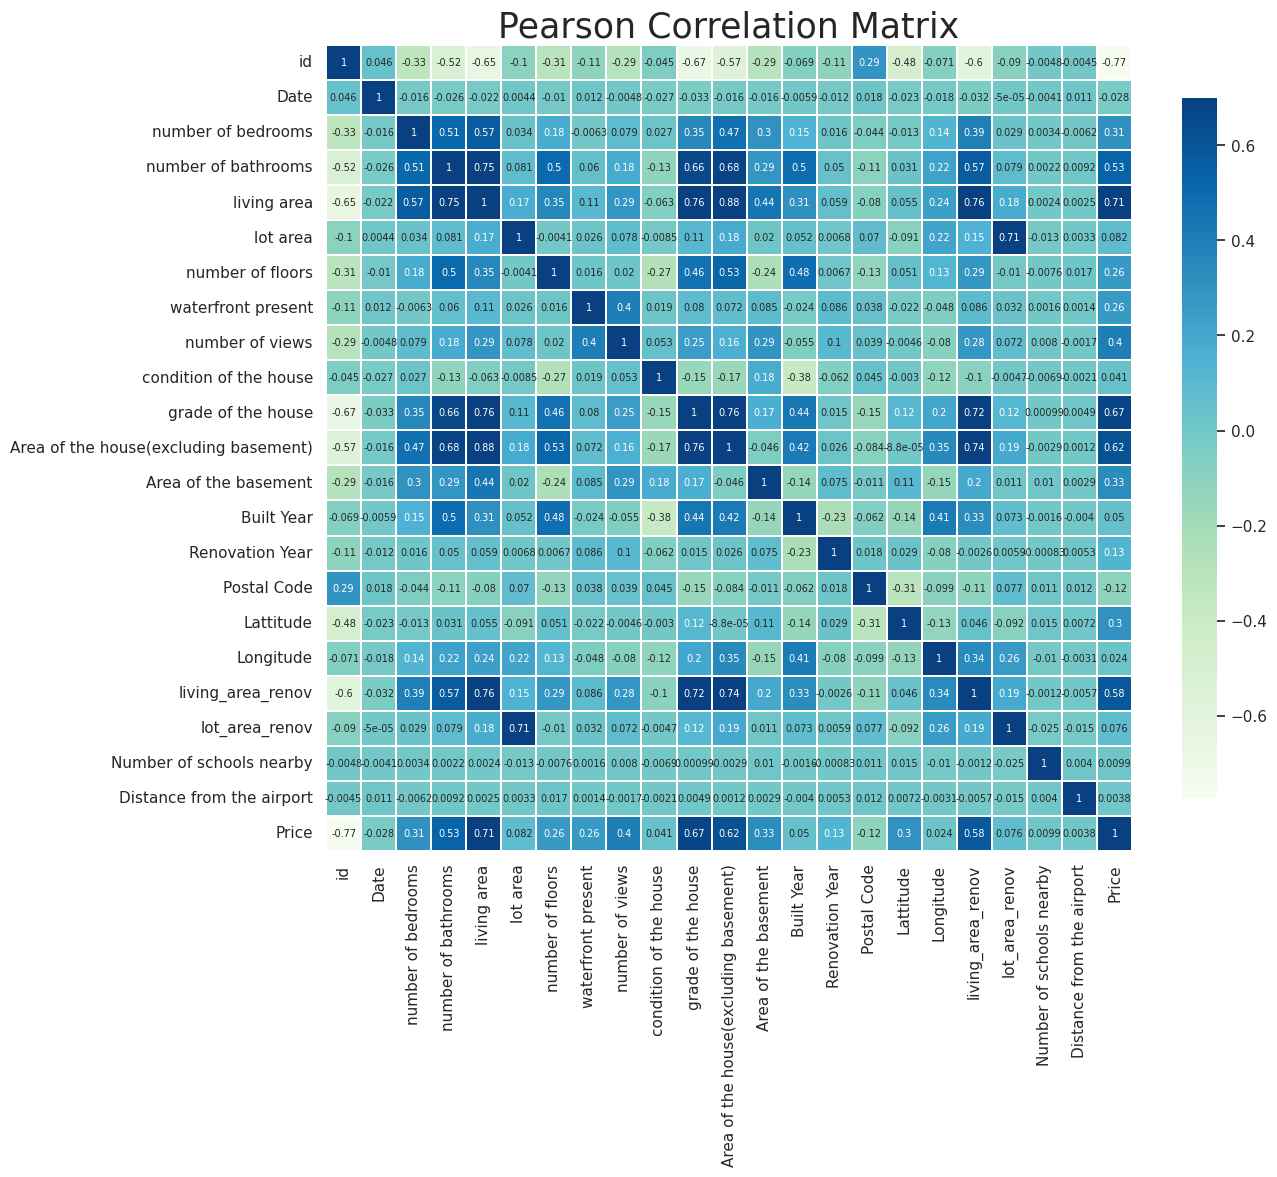

In [63]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [64]:
Price_corr = df.corr()['Price'].sort_values(ascending=False)
print(Price_corr)

Price                                    1.000000
living area                              0.712169
grade of the house                       0.671814
Area of the house(excluding basement)    0.615220
living_area_renov                        0.584924
number of bathrooms                      0.531735
number of views                          0.395973
Area of the basement                     0.330202
number of bedrooms                       0.308460
Lattitude                                0.297490
waterfront present                       0.263687
number of floors                         0.262732
Renovation Year                          0.133173
lot area                                 0.081992
lot_area_renov                           0.075535
Built Year                               0.050307
condition of the house                   0.041376
Longitude                                0.024414
Number of schools nearby                 0.009890
Distance from the airport                0.003804


<ipython-input-65-d09be89f87dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], ax=axes[0])


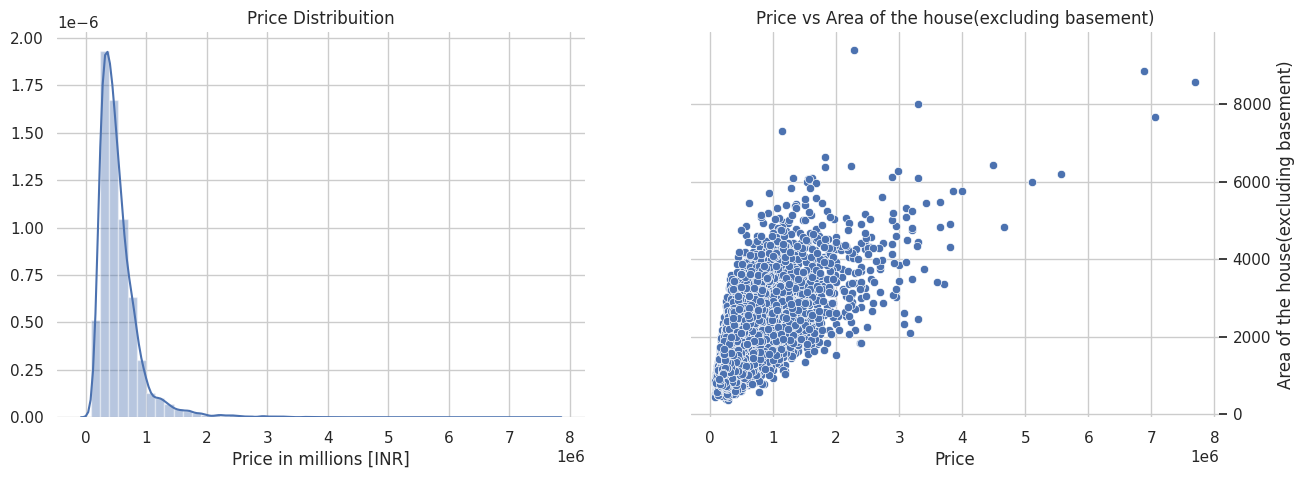

In [65]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['Price'], ax=axes[0])
sns.scatterplot(x='Price',y='Area of the house(excluding basement)', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [INR]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Area of the house(excluding basement)', title='Price vs Area of the house(excluding basement)')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

[Text(0.5, 0, 'Living area '),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Living area vs Price Box Plot')]

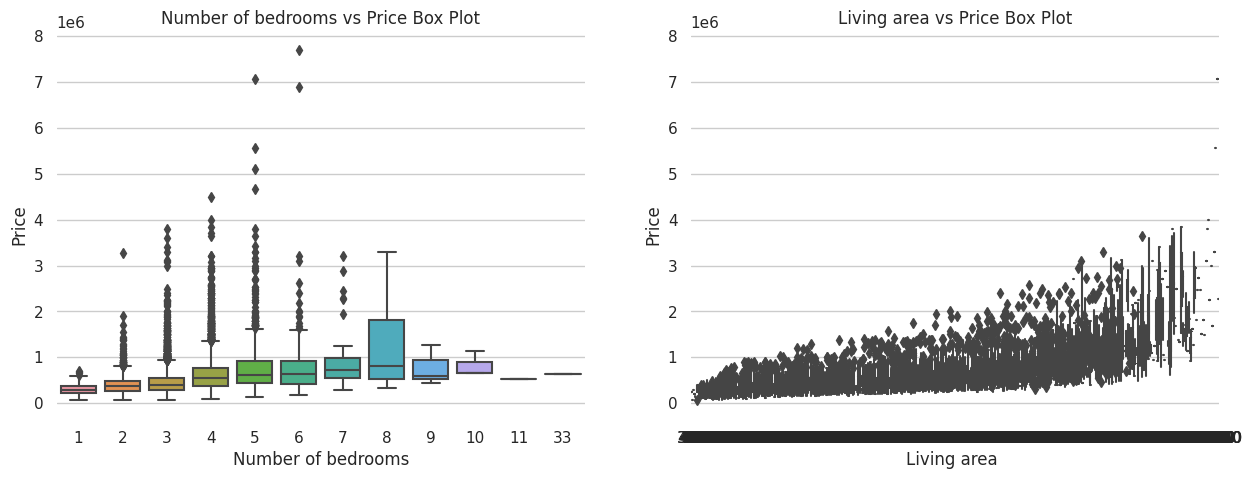

In [66]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['number of bedrooms'],y=df['Price'], ax=axes[0])
sns.boxplot(x=df['living area'],y=df['Price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Number of bedrooms', ylabel='Price', title='Number of bedrooms vs Price Box Plot')
axes[1].set(xlabel='Living area ', ylabel='Price', title='Living area vs Price Box Plot')

[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

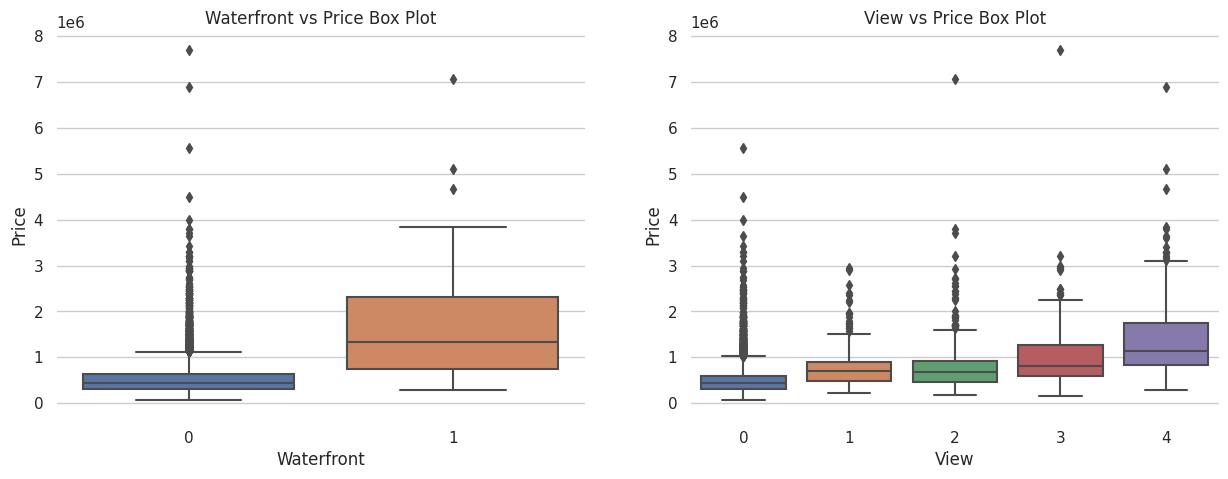

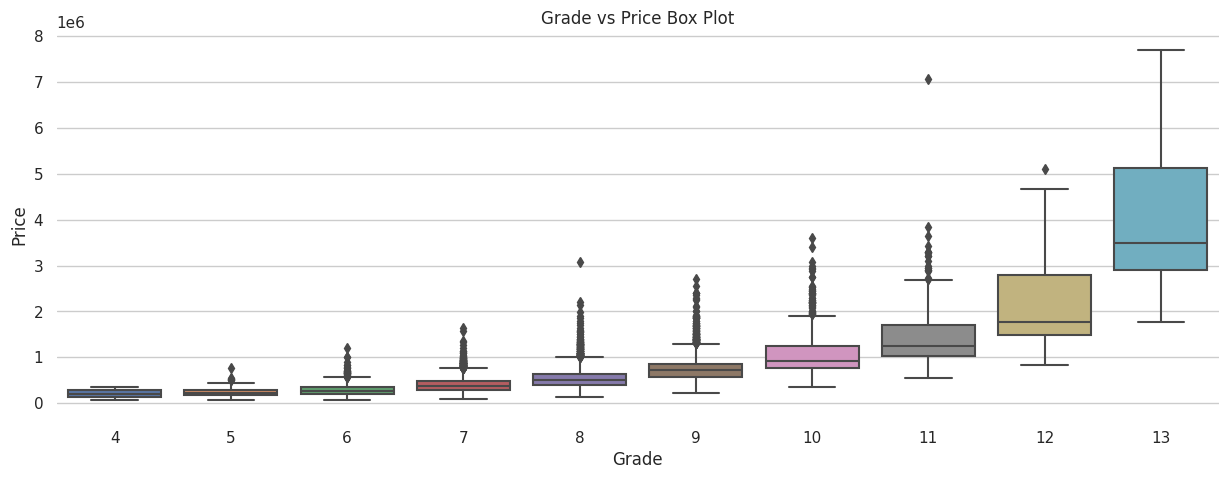

In [67]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront present'],y=df['Price'], ax=axes[0])
sns.boxplot(x=df['number of views'],y=df['Price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['grade of the house'],y=df['Price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')

In [68]:
df = df.drop('id', axis=1)
df = df.drop('Postal Code',axis=1)

In [69]:
df['Date'] = pd.to_datetime(df['Date'])

df['month'] = df['Date'].apply(lambda date:date.month)
df['year'] = df['Date'].apply(lambda date:date.year)

df = df.drop('Date',axis=1)

# Check the new columns
print(df.columns.values)

['number of bedrooms' 'number of bathrooms' 'living area' 'lot area'
 'number of floors' 'waterfront present' 'number of views'
 'condition of the house' 'grade of the house'
 'Area of the house(excluding basement)' 'Area of the basement'
 'Built Year' 'Renovation Year' 'Lattitude' 'Longitude'
 'living_area_renov' 'lot_area_renov' 'Number of schools nearby'
 'Distance from the airport' 'Price' 'month' 'year']


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Price'), Text(0.5, 1.0, 'Price Trends')]

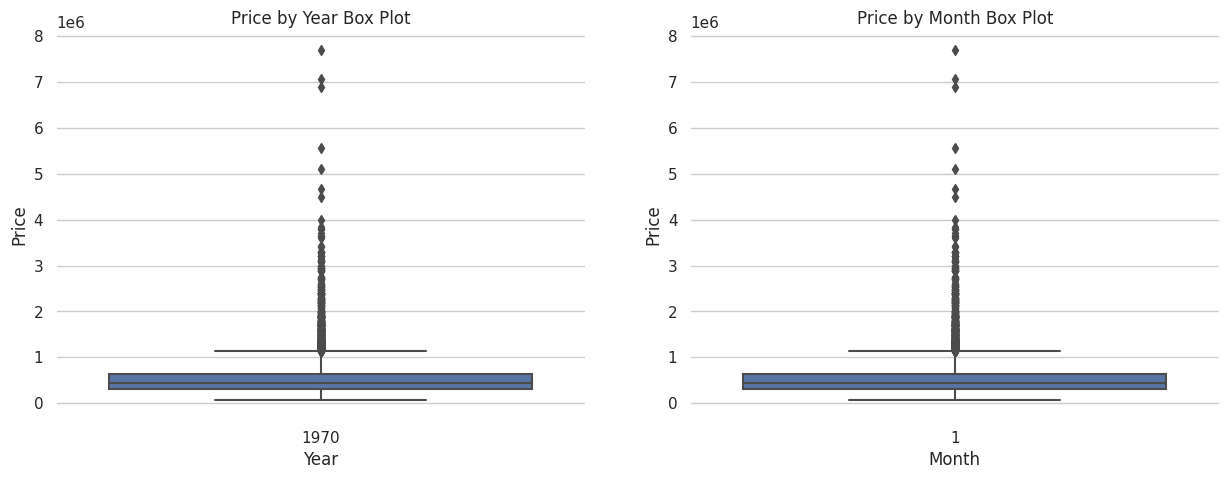

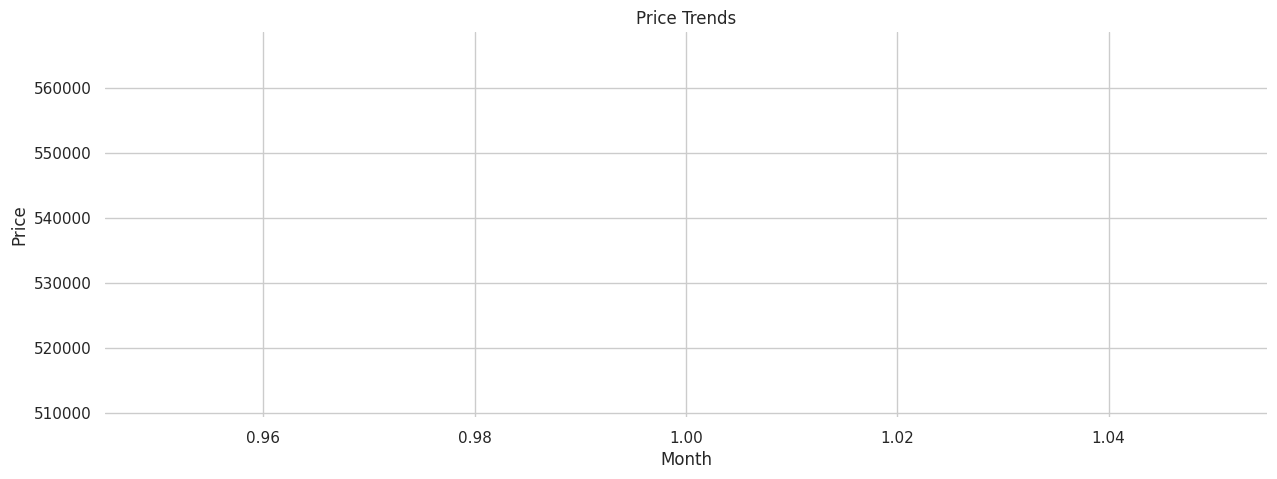

In [70]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='Price',data=df, ax=axes[0])
sns.boxplot(x='month',y='Price',data=df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
df.groupby('month').mean()['Price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

In [71]:
X = df.drop('Price',axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10234, 21)
(4386, 21)
(10234,)
(4386,)


In [73]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


**Build ANN Model**

**Input Layer**

**3 Hidden Layers**

**Output Layer**

In [74]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [75]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
80/80 [==============================] - 2s 5ms/step - loss: 425402597376.0000 - val_loss: 425764978688.0000
Epoch 2/400
80/80 [==============================] - 0s 3ms/step - loss: 425265987584.0000 - val_loss: 425324216320.0000
Epoch 3/400
80/80 [==============================] - 0s 3ms/step - loss: 423507165184.0000 - val_loss: 421044027392.0000
Epoch 4/400
80/80 [==============================] - 0s 3ms/step - loss: 412782854144.0000 - val_loss: 400594862080.0000
Epoch 5/400
80/80 [==============================] - 0s 3ms/step - loss: 375440506880.0000 - val_loss: 341603778560.0000
Epoch 6/400
80/80 [==============================] - 0s 3ms/step - loss: 291086663680.0000 - val_loss: 233800335360.0000
Epoch 7/400
80/80 [==============================] - 0s 3ms/step - loss: 178755387392.0000 - val_loss: 132366360576.0000
Epoch 8/400
80/80 [==============================] - 0s 3ms/step - loss: 112248725504.0000 - val_loss: 102423920640.0000
Epoch 9/400
80/80 [=============

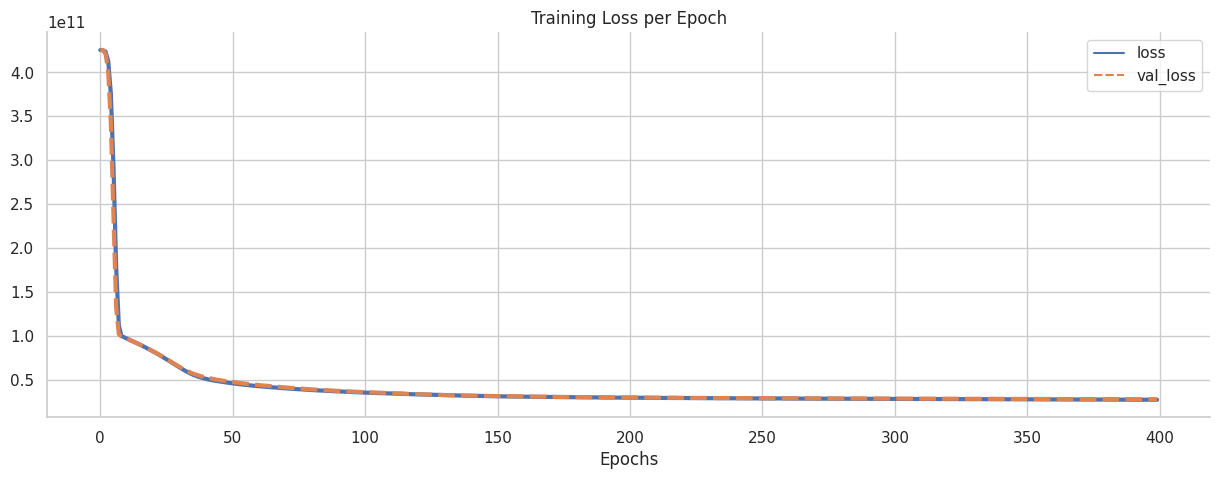

In [76]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [77]:
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['Price'].describe())

138/138 [==============================] - 0s 1ms/step
MAE:  103260.1503808282
MSE:  28556840693.84908
RMSE:  168987.6939124535
Variance Regression Score:  0.7874001688835057


Descriptive Statistics:
 count    1.462000e+04
mean     5.389322e+05
std      3.675324e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64


<ipython-input-78-b0c2d559097e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

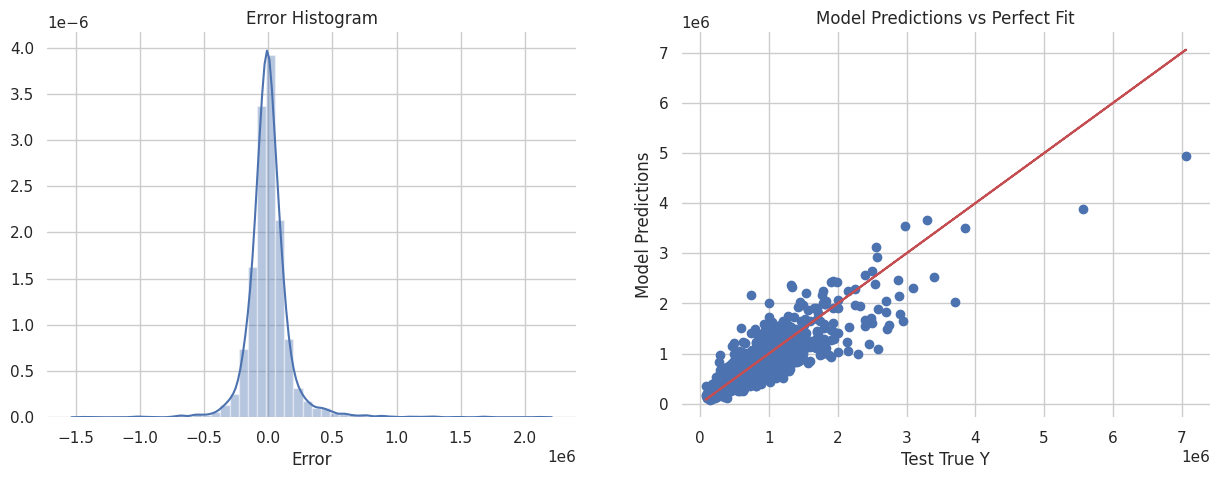

In [78]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

plt.scatter(y_test,predictions)

plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(4386, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [79]:
single_house = df.drop('Price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')


single_house = scaler.transform(single_house.values.reshape(-1, 21))

print('\nPrediction Price:',model.predict(single_house)[0,0])

print('\nOriginal Price:',df.iloc[0]['Price'])

Features of new house:
number of bedrooms                          5.0000
number of bathrooms                         2.5000
living area                              3650.0000
lot area                                 9050.0000
number of floors                            2.0000
waterfront present                          0.0000
number of views                             4.0000
condition of the house                      5.0000
grade of the house                         10.0000
Area of the house(excluding basement)    3370.0000
Area of the basement                      280.0000
Built Year                               1921.0000
Renovation Year                             0.0000
Lattitude                                  52.8645
Longitude                                -114.5570
living_area_renov                        2880.0000
lot_area_renov                           5400.0000
Number of schools nearby                    2.0000
Distance from the airport                  58.0000
month   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
